<a href="https://colab.research.google.com/github/Ucet786/hello-world/blob/master/openCVipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import glob
from sklearn.cluster import KMeans
import cv2

In [0]:
def preprocessing(img):
   
    RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    Ig = RGB[:, :, 2]
    [w,h] = np.shape(Ig)
    r=1200.0/Ig.shape[1]
    dim=(1200,int(Ig.shape[0]*r))
    rz = cv2.resize(Ig,dim,interpolation=cv2.INTER_AREA)
    g = 0.2 * (np.log(1 + np.float32(rz)))
    cvuint = cv2.convertScaleAbs(g)
    ret, th = cv2.threshold(cvuint, 0, 255, cv2.THRESH_OTSU)
    ret1,th1 = cv2.threshold(Ig,0,255,cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35,35))
    cls = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    Im = cls*rz 
    return (Im,th,th1,cls,g,RGB)

running code.... /content/drive/My Drive/dog1 (1).jpg
0
1
2
3


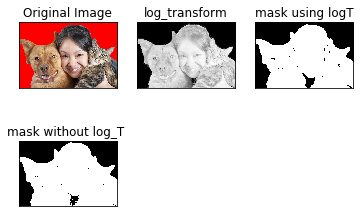

In [9]:
path_dir = glob.glob('/content/drive/My Drive/dog1 (1).jpg')
for k in path_dir:
    print('running code....',k)
    img = cv2.imread(k)
    (Im,th,th1,cls,g,RGB) = preprocessing(img)
    from matplotlib import pyplot as plt
    titles = ['Original Image', 'log_transform','mask using logT','mask without log_T ']
    images = [RGB,g,cls,th]
    for i in range(0,np.size(images)):
        print(i)
        plt.subplot(2, 3, i + 1)
        plt.imshow((images[i]),'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()